### E-Commerce sales Analysis 


In [3]:
import numpy as np 
import pandas as pd 
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('ecommerce_dataset_updated.csv')
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [6]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

### Revenue by Catogory

In [9]:
category_purchase_sum = df.groupby('Category')['Final_Price(Rs.)'].sum()
category_purchase_sum = category_purchase_sum.sort_values()
category_purchase_sum

Category
Electronics       100462.23
Beauty            104215.10
Toys              107289.69
Sports            108518.79
Home & Kitchen    110328.08
Books             111149.35
Clothing          115314.84
Name: Final_Price(Rs.), dtype: float64

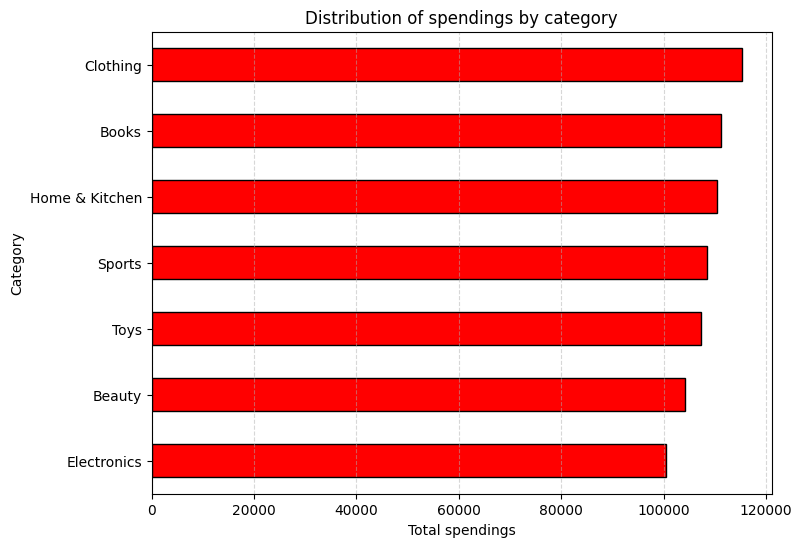

In [10]:
# Bar chart for categories
category_purchase_sum.plot(kind='barh', color='red', edgecolor='black', figsize=(8,6))

plt.title('Distribution of spendings by category')
plt.xlabel('Total spendings')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

### Segmentation of Customers Based on Purchase Behavior

In [11]:
# Amount of purchases for one person
consumer_purchase_count = df.groupby('User_ID')['Product_ID'].count()
consumer_purchase_count

User_ID
001ae40d    1
00209791    1
0021e458    1
00333c7a    1
00390cf5    1
           ..
ffb59cb8    1
ffcf6748    1
ffda329b    1
ffda47ed    1
fffca9db    1
Name: Product_ID, Length: 3660, dtype: int64

In [12]:
# Segment consumers by their spendings
consumer_spendings = df['Final_Price(Rs.)']
consumer_spendings

def segment_consumer(spendings):
    if spendings < 100:
        return 'Low spender'
    if spendings < 300:
        return 'Medium spender'
    else:
        return 'High spender'

df['User_segment'] = consumer_spendings.apply(segment_consumer)

print(df[['User_segment']].value_counts())

User_segment  
Medium spender    1823
High spender       955
Low spender        882
Name: count, dtype: int64


C:\Users\hario\AppData\Local\Temp\ipykernel_12708\2412238556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='User_segment', palette='viridis')


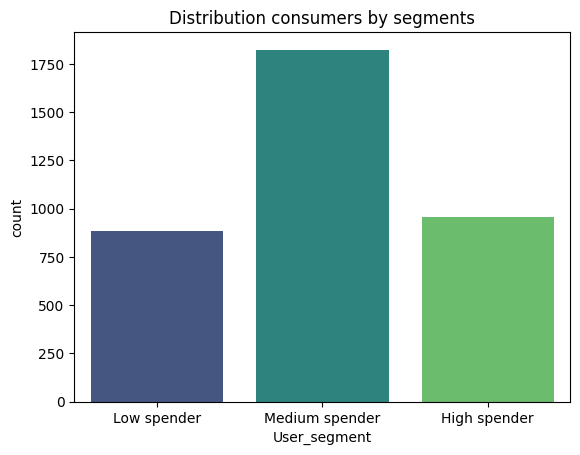

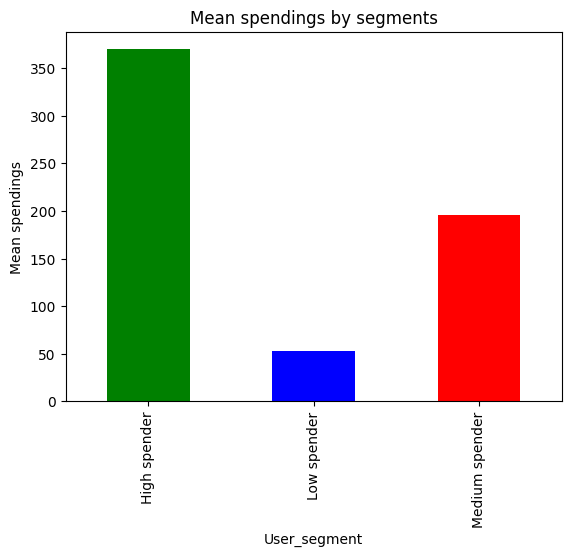

In [13]:
# Visualize segments
sns.countplot(data=df, x='User_segment', palette='viridis')
plt.title('Distribution consumers by segments')
plt.show()

segment_spending = df.groupby('User_segment')['Final_Price(Rs.)'].mean()
segment_spending.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Mean spendings by segments')
plt.ylabel('Mean spendings')
plt.show()

### Revenue & volume by category for each of discount group


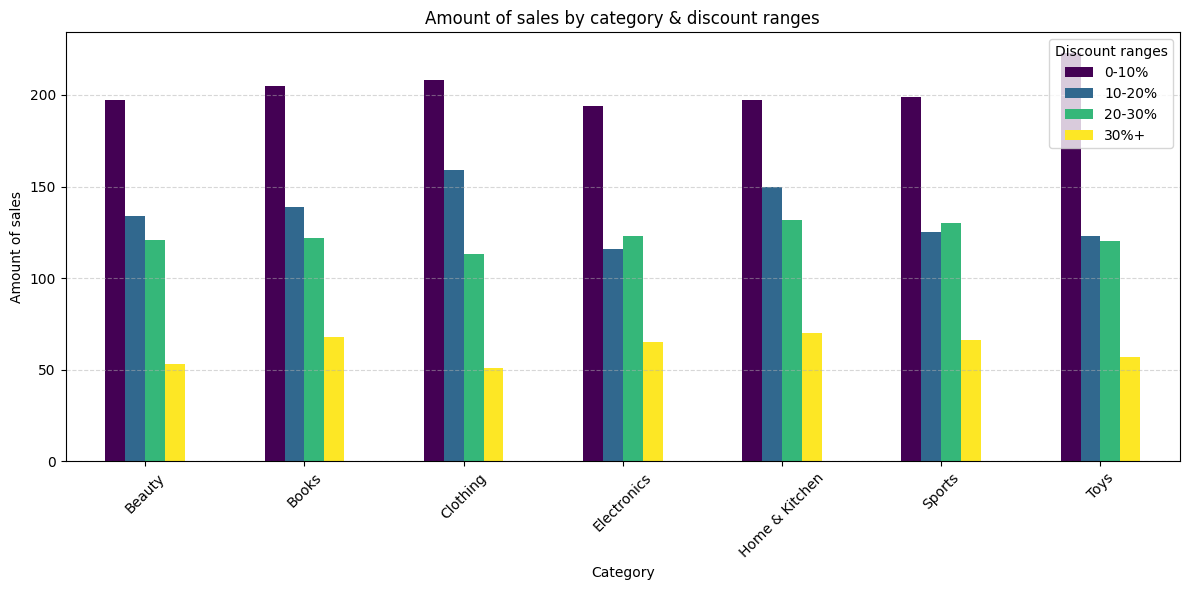

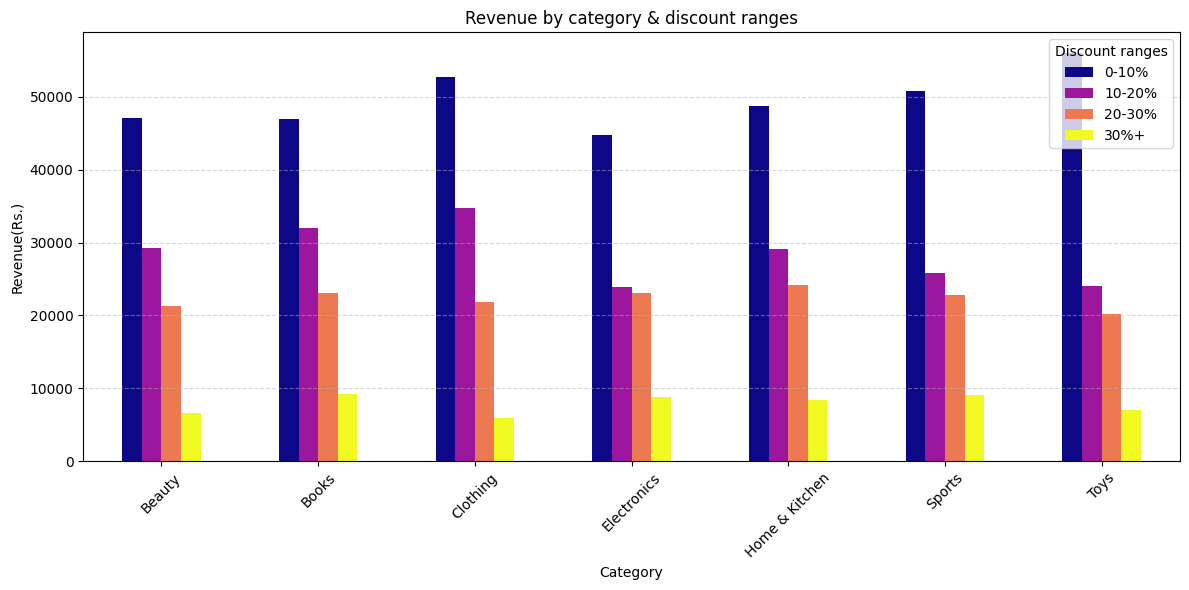

In [14]:
# Graphs for amount and revenue by discount ranges
bins = [0, 10, 20, 30, 100]
labels = ['0-10%', '10-20%', '20-30%', '30%+']
df['Discount_range'] = pd.cut(df['Discount (%)'],
                              bins=bins, labels=labels,
                              include_lowest=True)

category_discount_sales = df.groupby(['Category', 'Discount_range'],
                                     observed=False) \
                                     ['Product_ID'].count().unstack()

category_discount_revenue = df.groupby(['Category', 'Discount_range'],
                                       observed=False)\
                                    ['Final_Price(Rs.)'].sum().unstack()

# Amount of sales plot
fig, ax = plt.subplots(figsize=(12, 6))
category_discount_sales.plot(kind='bar', stacked=False, ax=ax,
                             colormap='viridis')

ax.set_title('Amount of sales by category & discount ranges')
ax.set_ylabel('Amount of sales')
ax.set_xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Discount ranges')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#Revenue plot
fig, ax = plt.subplots(figsize=(12, 6))
category_discount_revenue.plot(kind='bar', stacked=False, ax=ax,
                               colormap='plasma')

ax.set_title('Revenue by category & discount ranges')
ax.set_ylabel('Revenue(Rs.)')
ax.set_xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Discount ranges')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

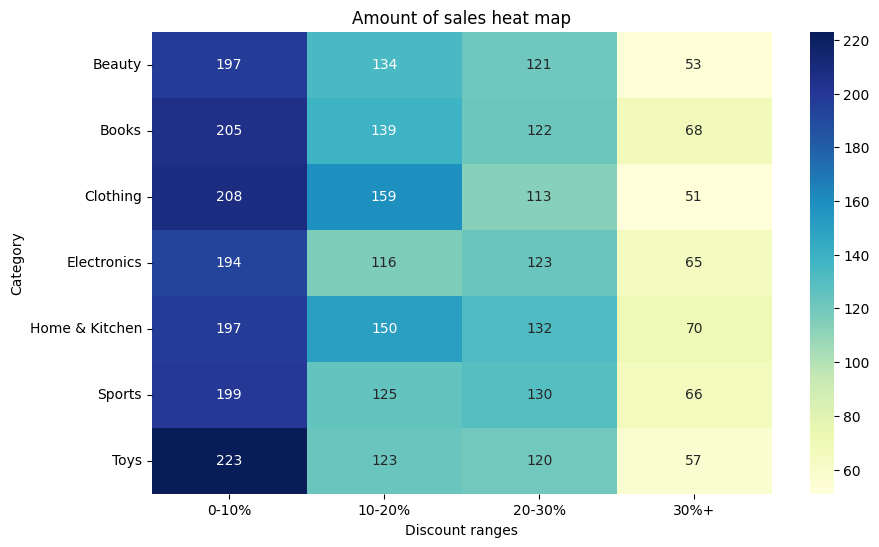

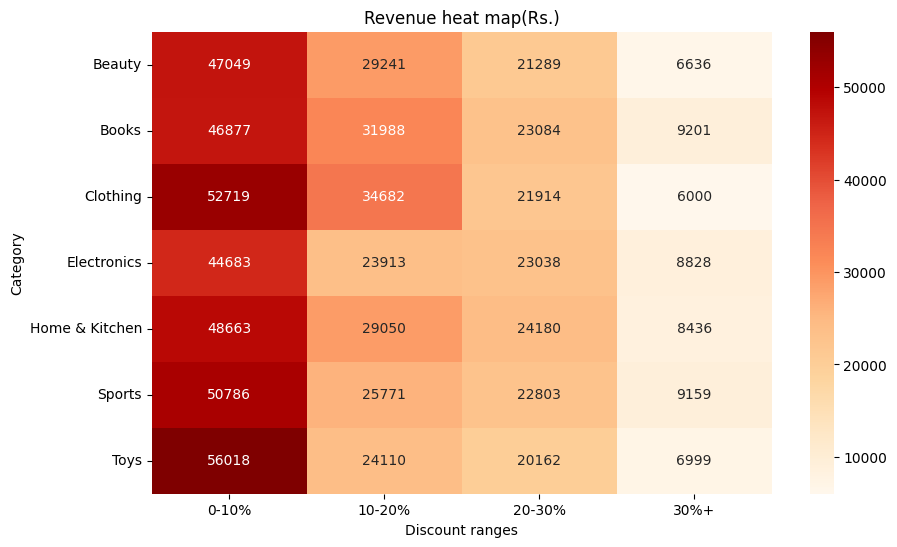

In [15]:
# Heat map for amount of sales
plt.figure(figsize=(10, 6))
sns.heatmap(category_discount_sales, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Amount of sales heat map')
plt.xlabel('Discount ranges')
plt.ylabel('Category')
plt.show()

# Heat map for revenue
plt.figure(figsize=(10, 6))
sns.heatmap(category_discount_revenue, annot=True, fmt='.0f', cmap='OrRd')
plt.title('Revenue heat map(Rs.)')
plt.xlabel('Discount ranges')
plt.ylabel('Category')
plt.show()

### Quarterly sales heat map by category & discount range

In [16]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format = "%d-%m-%Y")

df['Quarter'] = df['Purchase_Date'].dt.quarter
df['Month'] = df['Purchase_Date'].dt.month

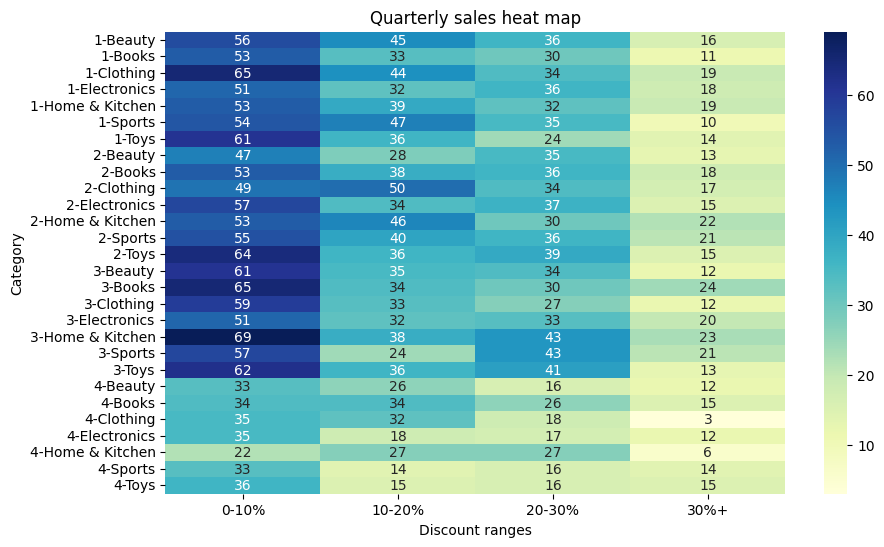

In [17]:
quarter_category_discount = df.groupby(['Quarter', 'Category', 'Discount_range'], observed=False) \
                                        ['Product_ID'].count().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(quarter_category_discount, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Quarterly sales heat map')
plt.xlabel('Discount ranges')
plt.ylabel('Category')
plt.show()

### Monthly revenue and volume linear graph

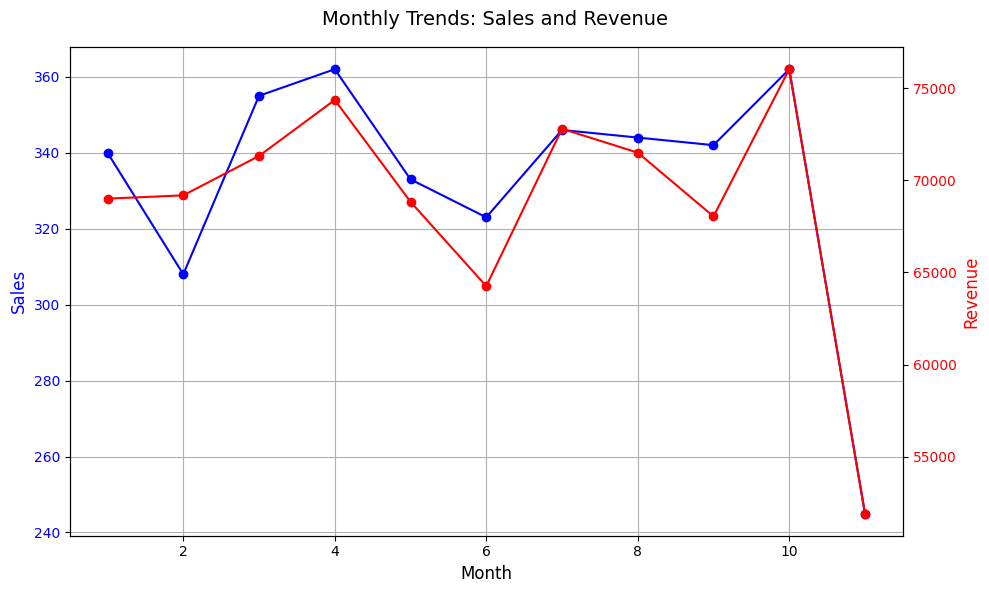

In [18]:
# Visuals for revenue and sales by months
monthly_sales = df.groupby('Month', observed=False)['Product_ID'].count()
monthly_revenue = df.groupby('Month', observed=False)['Final_Price(Rs.)'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Sales
ax1.plot(monthly_sales, color='blue', marker='o', label='Sales')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Sales', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Revenue
ax2 = ax1.twinx()
ax2.plot(monthly_revenue, color='red', marker='o', label='Revenue')
ax2.set_ylabel('Revenue', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Monthly Trends: Sales and Revenue', fontsize=14)

fig.tight_layout()
plt.show()

Detected category-like columns: ['Category']
Using 'Category' as the category column.

Counting 'Product_ID' occurrences per category — this represents the number of sales per category.

Total sales per category:

Category
Home & Kitchen    549
Books             534
Clothing          531
Toys              523
Sports            520
Beauty            505
Electronics       498
Name: Product_ID, dtype: int64


C:\Users\hario\AppData\Local\Temp\ipykernel_12708\3030496199.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


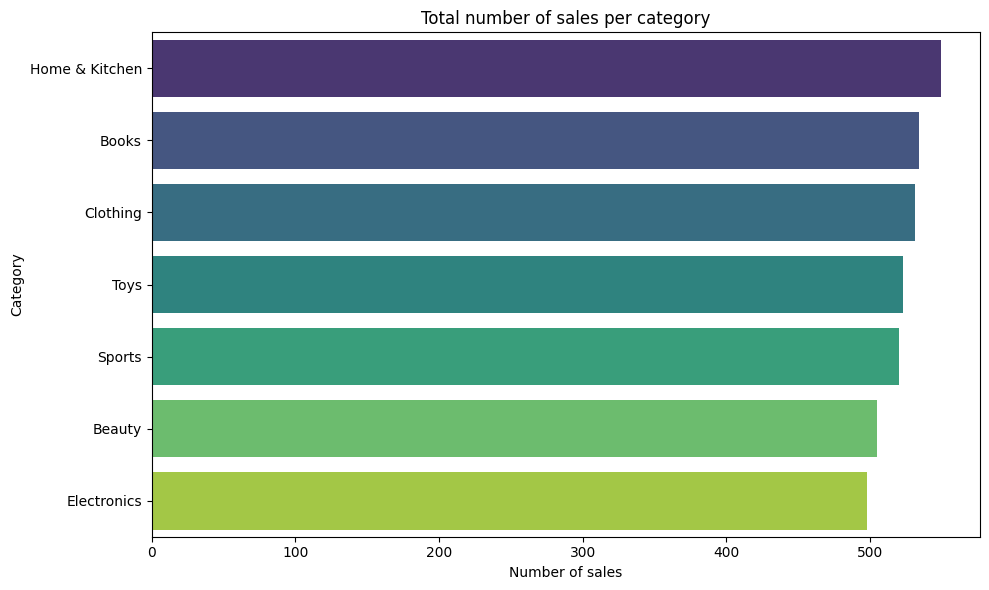

In [19]:
# Total number of sales per category (uses Product_ID count when available)
# Explain how `possible_cols` was constructed: it finds columns whose name contains
# the substring 'cat' or 'category' (case-insensitive). This is a simple heuristic
# to automatically pick the category column when the exact name isn't known.
possible_cols = [c for c in df.columns if 'cat' in c.lower() or 'category' in c.lower()]

if not possible_cols:
    print("No category-like column found. Available columns:\n", df.columns.tolist())
else:
    cat_col = possible_cols[0]
    print(f"Detected category-like columns: {possible_cols}")
    print(f"Using '{cat_col}' as the category column.\n")

    # If Product_ID exists we count product occurrences (sales), otherwise count rows
    if 'Product_ID' in df.columns:
        counts = df.groupby(cat_col)['Product_ID'].count()
        print("Counting 'Product_ID' occurrences per category — this represents the number of sales per category.")
    else:
        counts = df.groupby(cat_col).size()
        print("No 'Product_ID' column found; counting rows per category (each row treated as a sale).")

    counts = counts.sort_values(ascending=False)
    print('\nTotal sales per category:\n')
    print(counts)

    # Horizontal barplot for readability
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.title('Total number of sales per category')
    plt.xlabel('Number of sales')
    plt.ylabel(cat_col)
    plt.tight_layout()
    plt.show()

## Prediction Model

In [20]:
# Discount_effect - dicount as nominal value
# It provides better understanding of discount
# Ex: 20% of 100 = 20, but 20% of 500 is 100, so they're very different
df['Discount_effect'] = df['Discount (%)'] * df['Price (Rs.)'] / 100

# Setting up the model
target = 'Final_Price(Rs.)'
features = ['Price (Rs.)', 'Discount (%)', 'Month', 'Quarter', 'Discount_effect']

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
y_test

291     187.16
270      66.28
149     166.91
1188    344.44
2037    213.35
         ...  
31       61.65
1284     86.29
2645     97.91
3407     25.69
610     257.67
Name: Final_Price(Rs.), Length: 732, dtype: float64

In [22]:
# Evaluating
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

RMSE: 0.86
R^2 Score: 1.00


In [28]:
import joblib

# Save the Random Forest model directly in the project directory
joblib.dump(model, 'random_forest_model.joblib')
print("Random Forest model has been saved as 'random_forest_model.joblib'")

Random Forest model has been saved as 'random_forest_model.joblib'


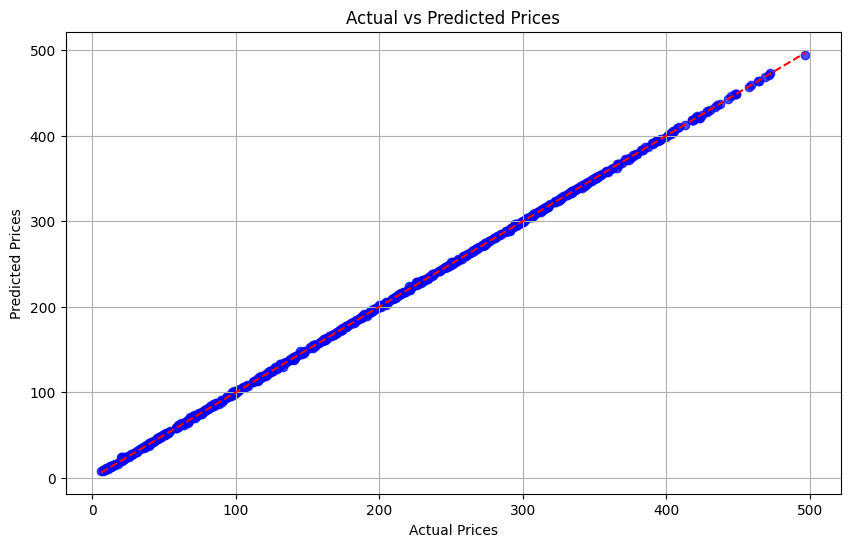

In [23]:
# Since RMSE & R^2 are really good, I think it's time for visualisation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

SVR RMSE: 0.63
SVR R^2: 1.000


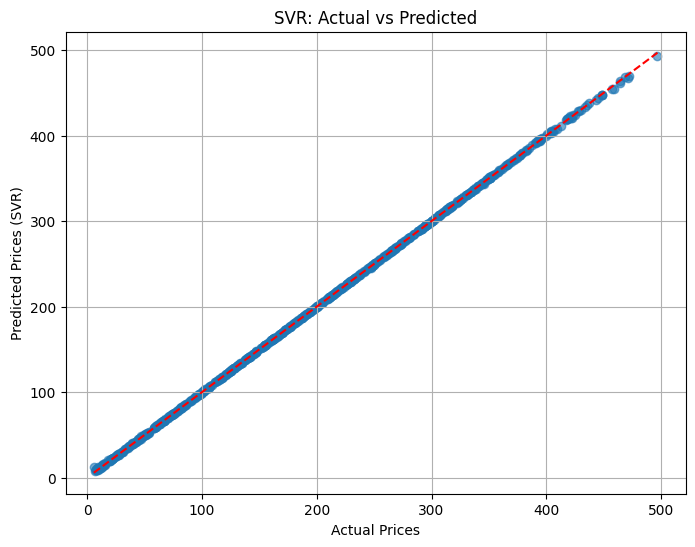

In [24]:
# Simple SVR model (mirrors your RandomForest style)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# (re)create Discount_effect & features to match your RF setup
df['Discount_effect'] = df['Discount (%)'] * df['Price (Rs.)'] / 100
target = 'Final_Price(Rs.)'
features = ['Price (Rs.)', 'Discount (%)', 'Month', 'Quarter', 'Discount_effect']

X = df[features]
y = df[target]

# reuse existing split if present, otherwise create it
if 'X_train' not in globals():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train SVR
svr = SVR(kernel='rbf', C=100, gamma='scale')
svr.fit(X_train_scaled, y_train)

# predict & evaluate
y_pred_svr = svr.predict(X_test_scaled)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR RMSE: {rmse_svr:.2f}")
print(f"SVR R^2: {r2_svr:.3f}")

# quick Actual vs Predicted plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_svr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (SVR)')
plt.grid(True)
plt.show()

In [26]:
# Take inputs for prediction
price = float(input('Enter Original Price (Rs.): '))
discount = float(input('Enter Discount % (0-100): '))
month = int(input('Enter Month (1-12): '))
quarter = int(input('Enter Quarter (1-4): '))

# Calculate discount effect (same as training)
discount_effect = (discount * price) / 100

print('\nYour inputs:')
print('-' * 30)
print(f'Original Price: Rs. {price}')
print(f'Discount: {discount}%')
print(f'Month: {month}')
print(f'Quarter: {quarter}')
print(f'Calculated Discount Effect: Rs. {discount_effect}')
print('-' * 30)

# Create input data with same features as training
input_data = pd.DataFrame([[price, discount, month, quarter, discount_effect]], 
                         columns=['Price (Rs.)', 'Discount (%)', 'Month', 'Quarter', 'Discount_effect'])

# Make predictions
rf_price = model.predict(input_data)[0]
svr_price = svr.predict(scaler.transform(input_data))[0]

print('\nPredicted Prices:')
print('-' * 30)
print(f'RandomForest: Rs. {rf_price:.2f}')
print(f'SVR: Rs. {svr_price:.2f}')
print(f'Average: Rs. {(rf_price + svr_price)/2:.2f}')
print('-' * 30)


Your inputs:
------------------------------
Original Price: Rs. 22.0
Discount: 30.0%
Month: 4
Quarter: 2
Calculated Discount Effect: Rs. 6.6
------------------------------

Predicted Prices:
------------------------------
RandomForest: Rs. 15.89
SVR: Rs. 15.38
Average: Rs. 15.63
------------------------------
